In [1]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import geopandas
gdf = geopandas.read_file("./utils/ne_10m_admin_0_countries_lakes.shp")[['ADMIN', 'ADM0_A3', 'geometry']]#.to_crs('+proj=robin')
gdf= gdf.rename(columns = {"ADMIN":"Country", "ADM0_A3":"alpha-3"})

dfCounty = pd.read_csv("./utils/ISO-3166-Countries-with-Regional-Codes.csv")

In [2]:
df = pd.read_pickle("data.pkl")
df.head()

,Name,Affiliation,Country,Year,Role,Subcommitte,ORCID,AffiliationRaw,CountryRaw,alpha-3,Region
0,Caroline Appert,Université Paris-Sud,France,2017,Paper Chair,Paper Chair,DATA-0000-0000-0004,Université Paris-Sud && CNRS,France && France,FRA,Europe
1,Juan Pablo Hourcade,University of Iowa,United States of America,2017,Paper Chair,Paper Chair,DATA-0000-0000-0005,University of Iowa,NaN,USA,Americas
2,Daniel Wigdor,University of Toronto,Canada,2017,Paper Chair,Paper Chair,0000-0003-2008-7070,University of Toronto,NaN,CAN,Americas
3,Michael Glueck,University of Toronto,Canada,2017,Assistant,Paper Chair,DATA-0000-0000-0006,University of Toronto,NaN,CAN,Americas
4,Mark Dunlop,University of Strathclyde,United Kingdom of Great Britain and Northern I...,2017,Subcommittee Chair,User Experience and Usability,DATA-0000-0000-0007,Strathclyde University,NaN,GBR,Europe


In [3]:
dfActiv = df[df.Role != "Assistant"]

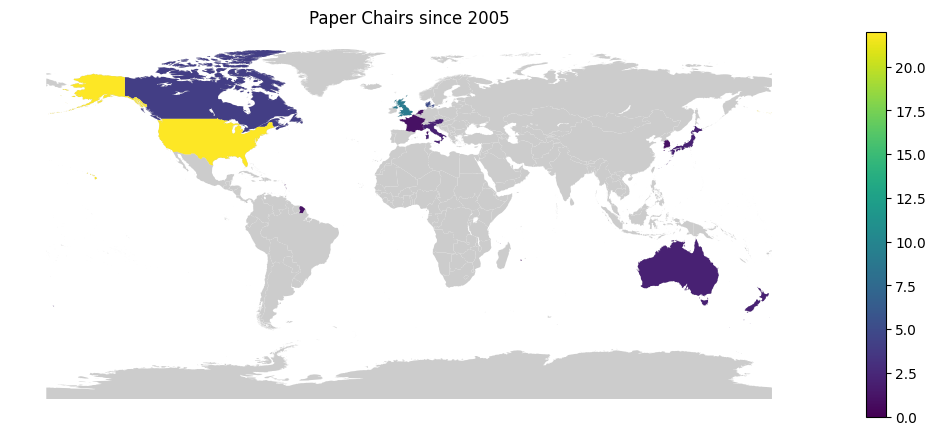

In [4]:
dfPaper = dfActiv[dfActiv.Role == "Paper Chair"]

value = "alpha-3"
dfC = dfPaper[value].value_counts()
#dfC = df[df[value] != "USA"][value].value_counts()
dfC = dfC.reset_index()
dfC.columns = [value, "Value"]
#dfC.Value = dfC.Value/dfC.Value.sum()*100

dfMap = pd.merge(gdf, dfC, left_on="alpha-3", right_on=value, how="outer")

fig, ax = plt.subplots(figsize=(15,5))
ax2 = gdf.plot( color='#CCCCCC', ax=ax )

dfMap[~dfMap.Value.isna()].plot( ax=ax, column='Value', legend=True, vmin=0)

plt.axis('off')
plt.title(f"Paper Chairs since {dfPaper.Year.min()}")
plt.show()

In [5]:
dfPaper.value_counts("Country")

Country
United States of America                                22
United Kingdom of Great Britain and Northern Ireland     9
Denmark                                                  5
Canada                                                   4
Australia                                                2
Austria                                                  2
Italy                                                    2
Japan                                                    2
New Zealand                                              2
Singapore                                                2
France                                                   1
Korea, Republic of                                       1
Netherlands                                              1
Name: count, dtype: int64

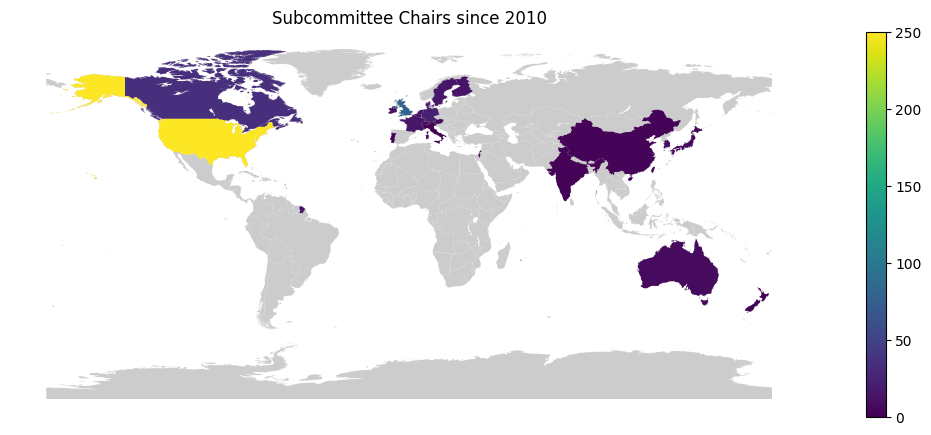

In [6]:
dfSC = df[df.Role == "Subcommittee Chair"]

value = "alpha-3"
dfC = dfSC[value].value_counts()
#dfC = df[df[value] != "USA"][value].value_counts()
dfC = dfC.reset_index()
dfC.columns = [value, "Value"]
#dfC.Value = dfC.Value/dfC.Value.sum()*100

dfMap = pd.merge(gdf, dfC, left_on="alpha-3", right_on=value, how="outer")

fig, ax = plt.subplots(figsize=(15,5))
ax2 = gdf.plot( color='#CCCCCC', ax=ax )

dfMap[~dfMap.Value.isna()].plot( ax=ax, column='Value', legend=True, vmin=0)

plt.axis('off')
plt.title(f"Subcommittee Chairs since {dfSC.Year.min()}")
plt.show()

In [7]:
dfSC.value_counts("Country")

Country
United States of America                                250
United Kingdom of Great Britain and Northern Ireland     79
Canada                                                   34
Germany                                                  22
Denmark                                                  18
Sweden                                                   14
France                                                   14
Finland                                                  13
Korea, Republic of                                       11
Netherlands                                              10
Ireland                                                   9
Austria                                                   7
Australia                                                 7
Japan                                                     5
Hong Kong                                                 5
Singapore                                                 4
Switzerland                     

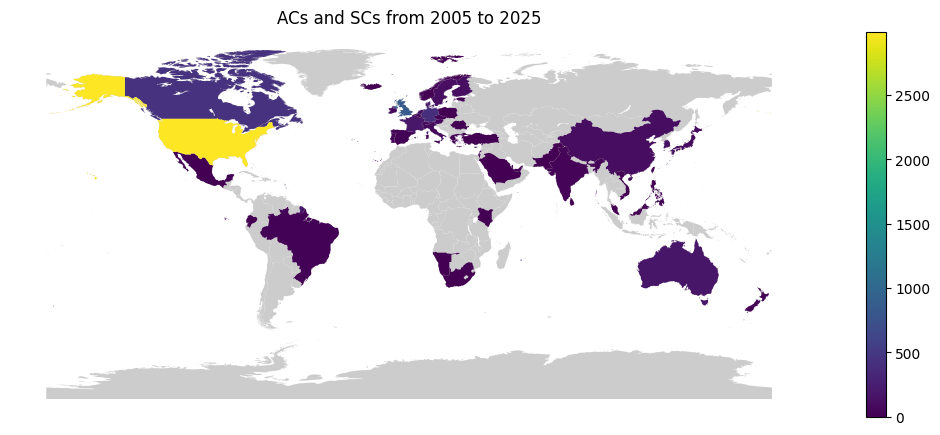

In [8]:
value = "alpha-3"
dfC = dfActiv[value].value_counts()
#dfC = dfActiv[dfActiv[value] != "USA"][value].value_counts()
dfC = dfC.reset_index()
dfC.columns = [value, "Value"]
#dfC.Value = dfC.Value/dfC.Value.sum()*100

dfMap = pd.merge(gdf, dfC, left_on="alpha-3", right_on=value, how="outer")

fig, ax = plt.subplots(figsize=(15,5))
ax2 = gdf.plot( color='#CCCCCC', ax=ax )

dfMap[~dfMap.Value.isna()].plot( ax=ax, column='Value', legend=True, vmin=0)

plt.title(f"ACs and SCs from {dfActiv.Year.min()} to {dfActiv.Year.max()}")

plt.axis('off')
plt.show()

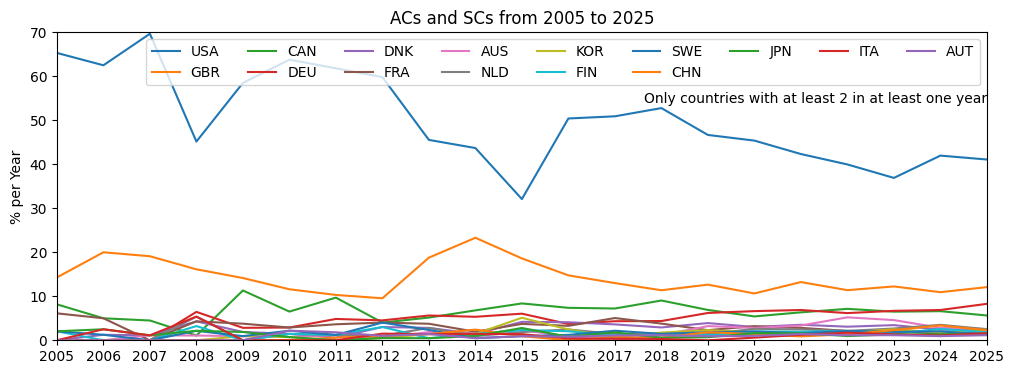

In [9]:
minPercentage = 2
fig, ax = plt.subplots(figsize=(12,4))
#years = list(range(dfActiv.Year.min(), dfActiv.Year.max()+1))
dfYears = dfActiv.groupby("Year").count().Name
for alpha3 in list(dfActiv["alpha-3"].value_counts().index):
    count = []
    for year in list(dfYears.index):
        count.append(len(dfActiv[(dfActiv["alpha-3"] == alpha3) & (dfActiv["Year"] == year)]))
    p = count/np.array(list(dfYears.values))*100
    if (len(p[p>minPercentage]) > 0):
        plt.plot(list(dfYears.index), p, label=alpha3)
plt.xticks(list(dfYears.index))
#plt.legend(ncol=5)
plt.xlim(min(list(dfYears.index)), max(list(dfYears.index)))
plt.ylim(0,70)
plt.ylabel("% per Year")
plt.title(f"ACs and SCs from {min(list(dfYears.index))} to {max(list(dfYears.index))}")
plt.text(max(list(dfYears.index)),  54, f"Only countries with at least {minPercentage} in at least one year", ha="right")
plt.legend(ncol=9, loc="upper right")
plt.show()

In [10]:
dfActiv[(dfActiv.Region == "Africa")]

,Name,Affiliation,Country,Year,Role,Subcommitte,ORCID,AffiliationRaw,CountryRaw,alpha-3,Region
33,Brian DeRenzi,University of Cape Town,South Africa,2017,Associate Chair,Specific Applications Areas,DATA-0000-0000-0033,University of Cape Town,NaN,ZAF,Africa
326,Melissa Densmore,University of Cape Town,South Africa,2016,Associate Chair,Specific Applications Areas,DATA-0000-0000-0291,University of Cape Town,NaN,ZAF,Africa
2202,Heike Winschiers-Theophilus,Namibia University of Science and Technology,Namibia,2022,Associate Chair,Design,DATA-0000-0000-1051,Namibia University of Science and Technology,Namibia,NAM,Africa
2367,Melissa Densmore,University of Cape Town,South Africa,2022,Associate Chair,"Critical Computing, Sustainability, and Social...",DATA-0000-0000-0291,University of Capetown,South Africa,ZAF,Africa
2538,Nicola J Bidwell,International University of Management,Namibia,2023,Associate Chair,"Critical Computing, Sustainability, and Social...",DATA-0000-0000-1246,International University of Management,Namibia,NAM,Africa
3035,Maletsabisa (Tsabi) Molapo,IBM,South Africa,2021,Associate Chair,Specific Applications Areas,0000-0002-1638-2301,IBM Research Africa,South Africa,ZAF,Africa
3507,Melissa Densmore,University of Cape Town,South Africa,2021,Associate Chair,Critical and Sustainable Computing,DATA-0000-0000-0291,University of Cape Town,NaN,ZAF,Africa
3612,Gary Marsden,University of Cape Town,South Africa,2009,Associate Chair,Paper Committee,DATA-0000-0000-1582,University of Cape Town,South Africa,ZAF,Africa
3729,Stephen Kimani,JKUAT,Kenya,2008,Associate Chair,Note Committee,DATA-0000-0000-1608,JKUAT,Kenya,KEN,Africa
4175,Erick Oduor,IBM,Kenya,2020,Associate Chair,"Understanding People: Theory, Concepts, and Me...",DATA-0000-0000-1709,IBM Research Africa,Kenya,KEN,Africa


In [11]:
dfActiv[dfActiv.Region.isna()]

,Name,Affiliation,Country,Year,Role,Subcommitte,ORCID,AffiliationRaw,CountryRaw,alpha-3,Region
8,Jean Scholtz,NaN,None,2017,Associate Chair,User Experience and Usability,DATA-0000-0000-0009,Independent Consultant,NaN,NaN,NaN
1514,Connor Graham,NaN,None,2012,Associate Chair,"Understanding People: Theory, Concepts, and Me...",DATA-0000-0000-0726,Independent,NaN,NaN,NaN
3937,Tara Matthews,NaN,None,2020,Associate Chair,Privacy and Security,DATA-0000-0000-1599,Independent Researcher,NaN,NaN,NaN
6029,Carolin Reichherzer,NaN,None,2025,Associate Chair,Specific Applications Areas,DATA-0000-0000-0851,Independent,NaN,NaN,NaN
6174,IIaria Torre,None,None,2025,Associate Chair,Understanding People — Mixed and Alternative M...,DATA-0000-0000-2340,NaN,NaN,NaN,NaN
6175,David Lee,None,None,2025,Associate Chair,Understanding People — Mixed and Alternative M...,DATA-0000-0000-2341,NaN,NaN,NaN,NaN


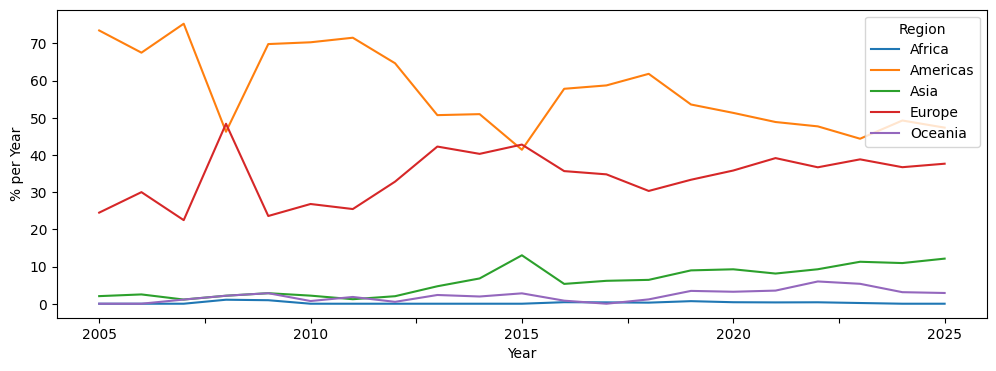

In [12]:
fig, ax = plt.subplots(figsize=(12,4))

dfR = dfActiv[~dfActiv.Region.isna()]
dfR = dfR.groupby(["Year", "Region"]).count().Name.reset_index()
dfR
dfR = pd.pivot_table(dfR, values = 'Name', index=['Region'], columns = 'Year').reset_index()
dfR = dfR.fillna(0)
dfR = dfR.set_index("Region")
#del dfR["Year"]
dfR = dfR.T
dfR = (dfR.T/dfR.T.sum() * 100).T 
dfR.plot(ax=ax)

#years = list(dfR.index)
#plt.xticks(years)
#plt.legend(ncol=5)
#plt.xlim(min(years), max(years))

#plt.ylim(0,75)
plt.ylabel("% per Year")

plt.show()

In [13]:
i = 0

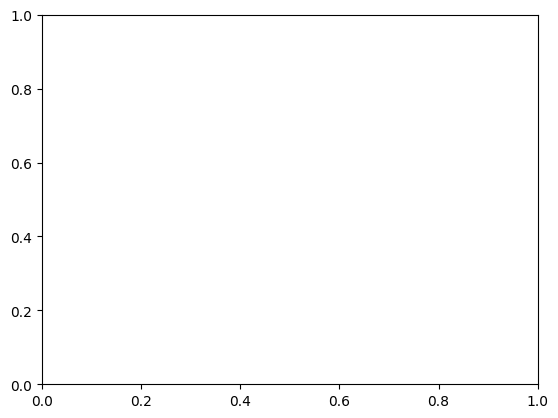

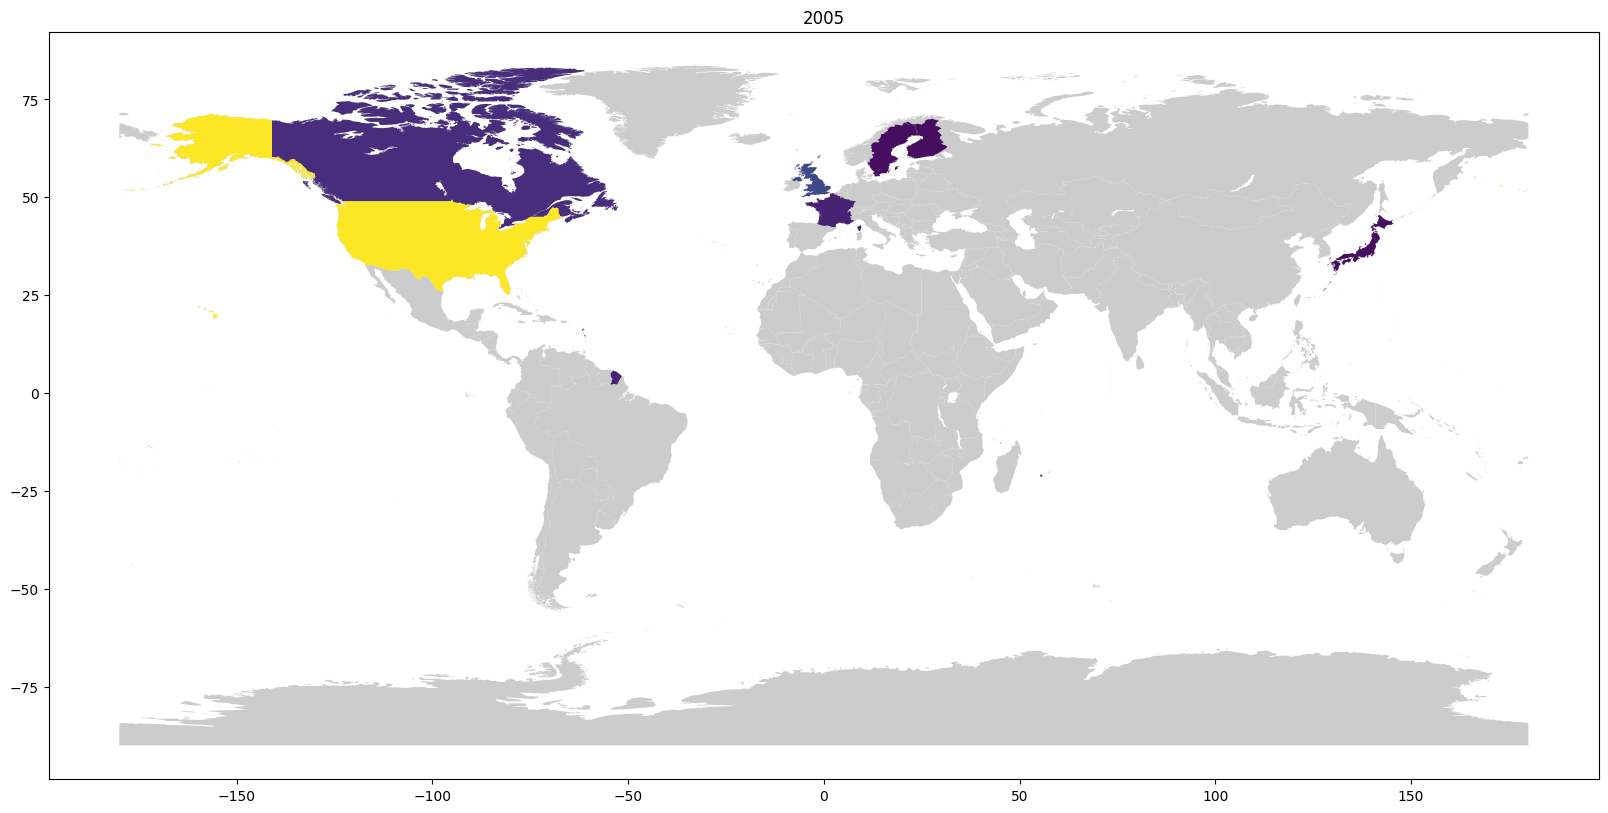

In [14]:
import matplotlib.animation as animation

dfC = df[df.Year == i+2005][value].value_counts()
#dfC = df[df[value] != "USA"][value].value_counts()
dfC = dfC.reset_index()
dfC.columns = [value, "Value"]
#dfC.Value = dfC.Value/dfC.Value.sum()*100

dfMap = pd.merge(gdf, dfC, left_on="alpha-3", right_on=value, how="outer")

fig, ax = plt.subplots(figsize=(20,10))
ax2 = gdf.plot( color='#CCCCCC', ax=ax )

plot = dfMap[~dfMap.Value.isna()].plot( ax=ax, column='Value', legend=False, vmin=0)


def animate(i):
    #print(i+2005)
    #scat.set_offsets((x[i], 0))
    ax.clear()
    value = "alpha-3"
    dfC = df[df.Year == i+2005][value].value_counts()
    #dfC = df[df[value] != "USA"][value].value_counts()
    dfC = dfC.reset_index()
    dfC.columns = [value, "Value"]
    #dfC.Value = dfC.Value/dfC.Value.sum()*100

    dfMap = pd.merge(gdf, dfC, left_on="alpha-3", right_on=value, how="outer")

    ax2 = gdf.plot( color='#CCCCCC', ax=ax )
    plot = dfMap[~dfMap.Value.isna()].plot( ax=ax, column='Value', legend=False, vmin=0)
    plt.title(i+2005)
    return plot,

ani = animation.FuncAnimation(fig, animate, repeat=True, frames=19, interval=1000)

# To save the animation using Pillow as a gif
writer = animation.PillowWriter(fps=1,
                                metadata=dict(artist='Me'),
                                bitrate=1800)
ani.save('scatter.gif', writer=writer)
#plt.show()